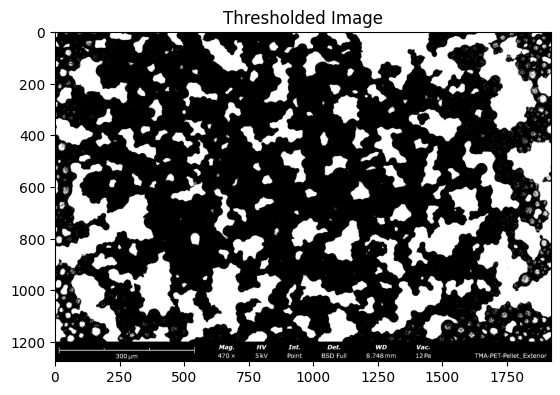

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (2).jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.show()


In [19]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the center of each particle (contour)
particles = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        particles.append([cX, cY])

particles = np.array(particles)


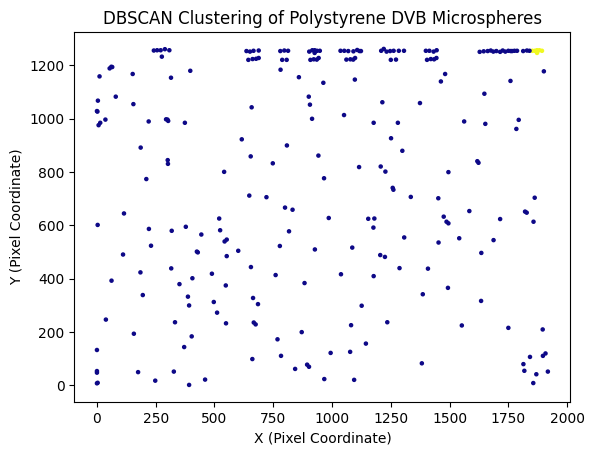

In [22]:
from sklearn.cluster import DBSCAN

# Set DBSCAN parameters
dbscan = DBSCAN(eps=20, min_samples=5)  # Adjust `eps` based on your image scaling
labels = dbscan.fit_predict(particles)

# Plot the clustered 
plt.scatter(particles[:, 0], particles[:, 1], c=labels, cmap='plasma', s=5)
plt.title('DBSCAN Clustering of Polystyrene DVB Microspheres')
plt.xlabel('X (Pixel Coordinate)')
plt.ylabel('Y (Pixel Coordinate)')
plt.show()


In [23]:
# Get unique cluster labels (excluding noise, which is labeled as -1)
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Number of clusters: {n_clusters}")

# For each cluster, calculate size and average particle spacing
for label in unique_labels:
    if label == -1:  # Skip noise
        continue
    cluster_points = particles[labels == label]
    print(f"Cluster {label}: {len(cluster_points)} particles")


Number of clusters: 1
Cluster 0: 6 particles
